# ECUALIZACIÓN (SE GUARDA CON EL NOMBRE DE "IMAGEN_ECUALIZADA")

Imagen ecualizada guardada como "imagen_ecualizada.jpg" en la carpeta actual.


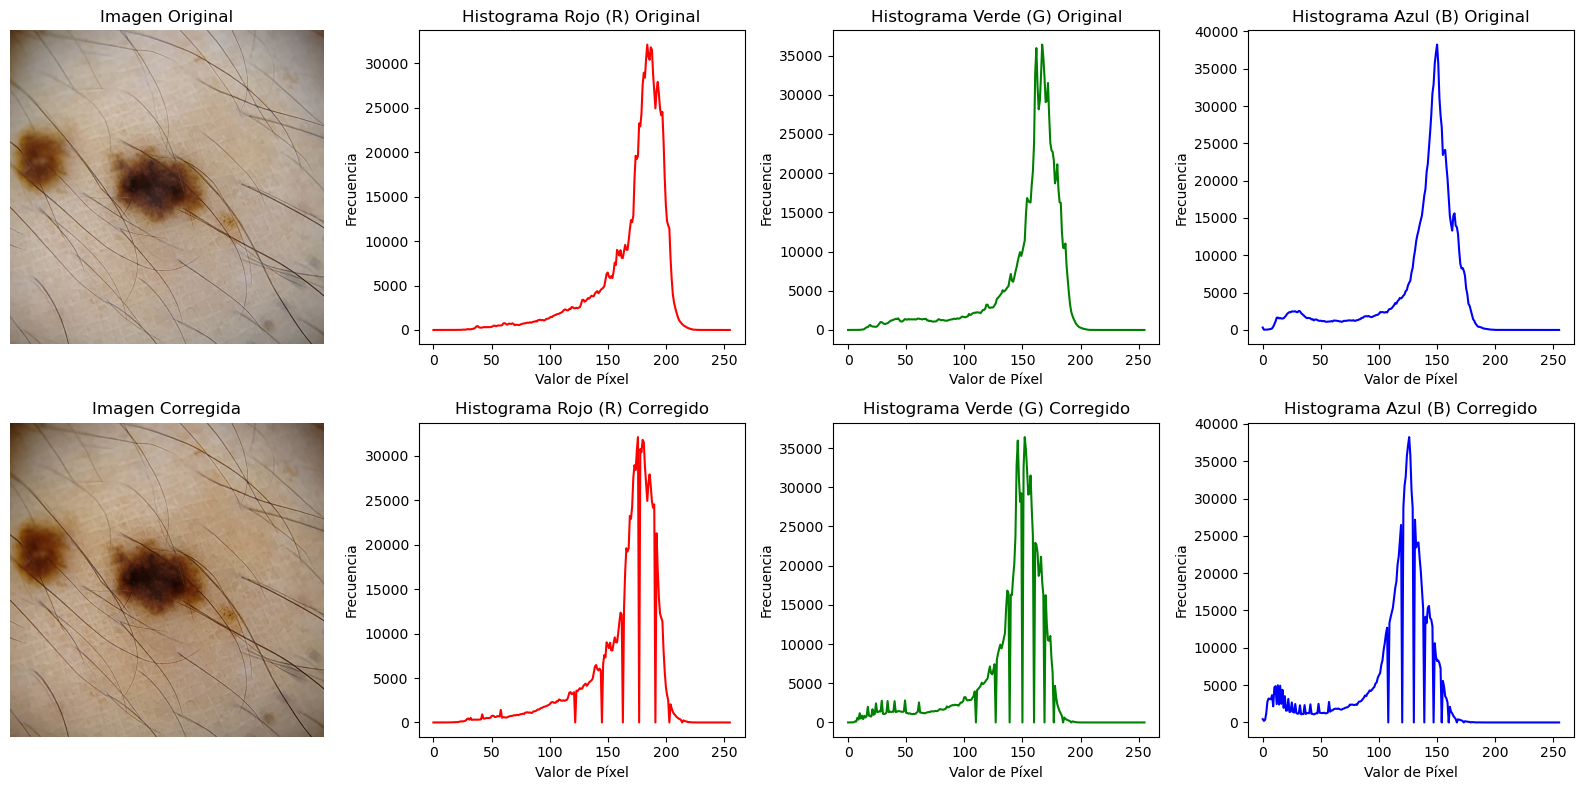

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en formato BGR (OpenCV carga las imágenes en formato BGR por defecto)
imagen = cv2.imread('miche.jpg')

# Separa los canales de color (R, G, B) de la imagen
canal_b, canal_g, canal_r = cv2.split(imagen)

# Calcula los histogramas de cada canal para la imagen original
hist_b = cv2.calcHist([canal_b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([canal_g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([canal_r], [0], None, [256], [0, 256])

# Definir los parámetros gamma para cada canal (ajusta estos valores según tus necesidades)
gamma_r = 1.12  # Parámetro gamma para el canal Rojo (R)
gamma_g = 1.22  # Parámetro gamma para el canal Verde (G)
gamma_b = 1.32  # Parámetro gamma para el canal Azul (B)

# Aplicar la corrección gamma a cada canal
canal_b_corregido = np.power(canal_b / 255.0, gamma_b) * 255.0
canal_g_corregido = np.power(canal_g / 255.0, gamma_g) * 255.0
canal_r_corregido = np.power(canal_r / 255.0, gamma_r) * 255.0

# Combinar los canales corregidos en una imagen RGB corregida
imagen_corregida_rgb = cv2.merge((canal_b_corregido, canal_g_corregido, canal_r_corregido)).astype(np.uint8)

# Calcula los histogramas de cada canal para la imagen corregida
hist_b_corregido = cv2.calcHist([canal_b_corregido.astype(np.uint8)], [0], None, [256], [0, 256])
hist_g_corregido = cv2.calcHist([canal_g_corregido.astype(np.uint8)], [0], None, [256], [0, 256])
hist_r_corregido = cv2.calcHist([canal_r_corregido.astype(np.uint8)], [0], None, [256], [0, 256])

# Crear subtramas para mostrar la imagen original, la imagen corregida y los histogramas
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Mostrar la imagen original en la primera columna
axs[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')  # Ocultar ejes
axs[0, 0].set_title('Imagen Original')

# Mostrar el histograma del canal Rojo (R) para la imagen original en la segunda columna
axs[0, 1].plot(hist_r, color='red')
axs[0, 1].set_title('Histograma Rojo (R) Original')
axs[0, 1].set_xlabel('Valor de Píxel')
axs[0, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen original en la tercera columna
axs[0, 2].plot(hist_g, color='green')
axs[0, 2].set_title('Histograma Verde (G) Original')
axs[0, 2].set_xlabel('Valor de Píxel')
axs[0, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen original en la cuarta columna
axs[0, 3].plot(hist_b, color='blue')
axs[0, 3].set_title('Histograma Azul (B) Original')
axs[0, 3].set_xlabel('Valor de Píxel')
axs[0, 3].set_ylabel('Frecuencia')

# Mostrar la imagen corregida en la quinta columna
axs[1, 0].imshow(cv2.cvtColor(imagen_corregida_rgb, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')  # Ocultar ejes
axs[1, 0].set_title('Imagen Corregida')

# Mostrar el histograma del canal Rojo (R) para la imagen corregida en la sexta columna
axs[1, 1].plot(hist_r_corregido, color='red')
axs[1, 1].set_title('Histograma Rojo (R) Corregido')
axs[1, 1].set_xlabel('Valor de Píxel')
axs[1, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen corregida en la séptima columna
axs[1, 2].plot(hist_g_corregido, color='green')
axs[1, 2].set_title('Histograma Verde (G) Corregido')
axs[1, 2].set_xlabel('Valor de Píxel')
axs[1, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen corregida en la octava columna
axs[1, 3].plot(hist_b_corregido, color='blue')
axs[1, 3].set_title('Histograma Azul (B) Corregido')
axs[1, 3].set_xlabel('Valor de Píxel')
axs[1, 3].set_ylabel('Frecuencia')

# Ruta y nombre de archivo para guardar la imagen ecualizada
nombre_archivo_ecualizado = 'imagen_ecualizada.jpg'

# Guardar la imagen ecualizada en la misma carpeta que tu cuaderno de Jupyter
cv2.imwrite(nombre_archivo_ecualizado, imagen_corregida_rgb)

# Imprimir un mensaje de confirmación
print(f'Imagen ecualizada guardada como "{nombre_archivo_ecualizado}" en la carpeta actual.')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar las subtramas
plt.show()


# AGUDIZACIÓN (SE GUARDA CON EL NOMBRE DE "IMAGEN_AGUDIZADA")

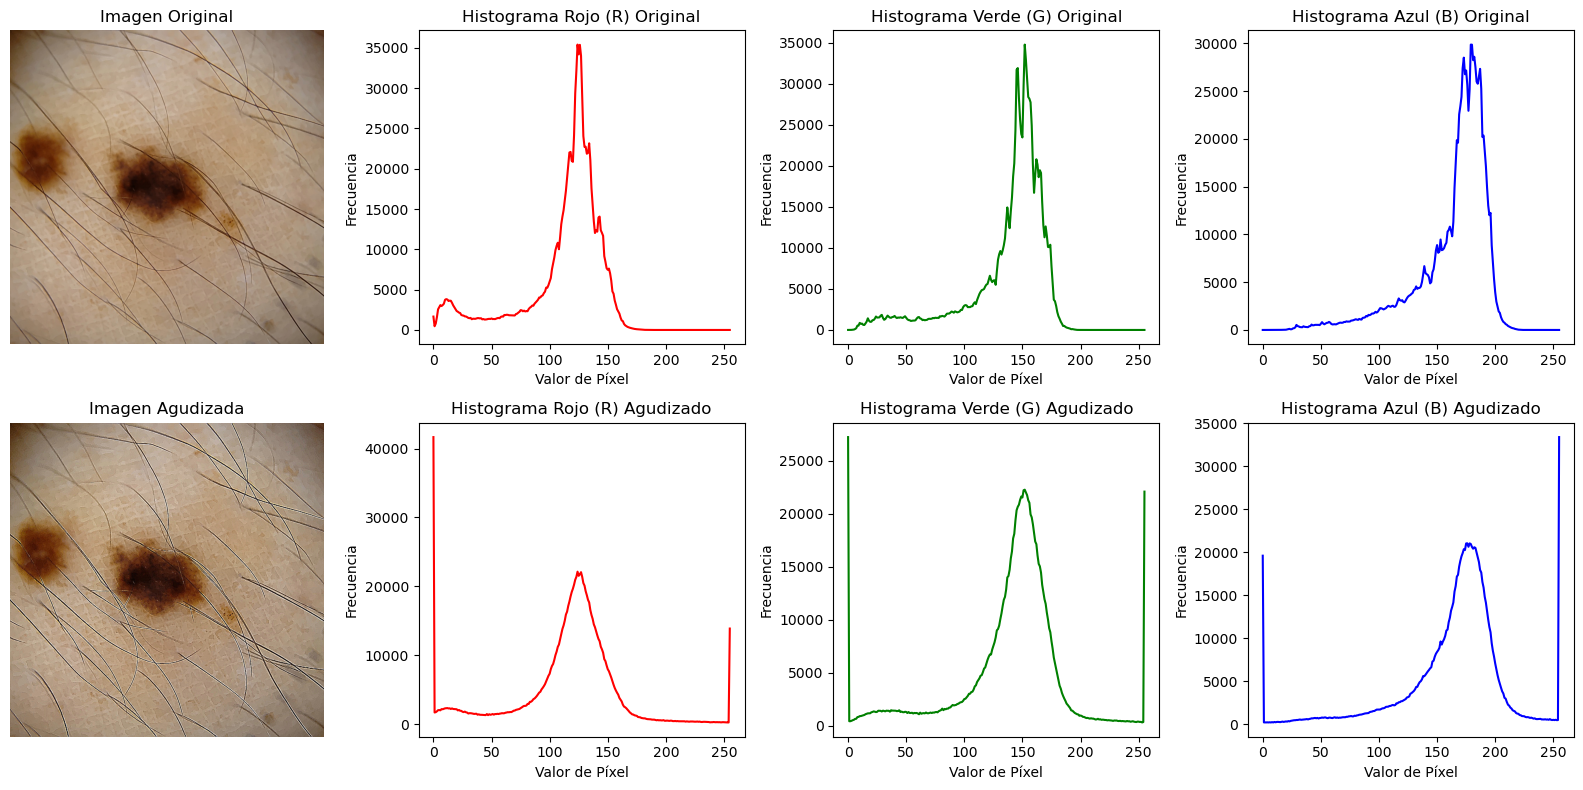

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('imagen_ecualizada.jpg')

# Crear el kernel de agudización
kernel_agudizacion = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])

# Aplicar el filtro de agudización
imagen_agudizada = cv2.filter2D(imagen, -1, kernel_agudizacion)

# Calcular los histogramas de la imagen original
hist_r_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_g_original = cv2.calcHist([imagen], [1], None, [256], [0, 256])
hist_b_original = cv2.calcHist([imagen], [2], None, [256], [0, 256])

# Calcular los histogramas de la imagen agudizada
hist_r_agudizada = cv2.calcHist([imagen_agudizada], [0], None, [256], [0, 256])
hist_g_agudizada = cv2.calcHist([imagen_agudizada], [1], None, [256], [0, 256])
hist_b_agudizada = cv2.calcHist([imagen_agudizada], [2], None, [256], [0, 256])

# Crear subtramas para mostrar la imagen original, los histogramas originales y la imagen agudizada con los histogramas
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Mostrar la imagen original en la primera columna
axs[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')  # Ocultar ejes
axs[0, 0].set_title('Imagen Original')

# Mostrar el histograma del canal Rojo (R) para la imagen original en la segunda columna
axs[0, 1].plot(hist_r_original, color='red')
axs[0, 1].set_title('Histograma Rojo (R) Original')
axs[0, 1].set_xlabel('Valor de Píxel')
axs[0, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen original en la tercera columna
axs[0, 2].plot(hist_g_original, color='green')
axs[0, 2].set_title('Histograma Verde (G) Original')
axs[0, 2].set_xlabel('Valor de Píxel')
axs[0, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen original en la cuarta columna
axs[0, 3].plot(hist_b_original, color='blue')
axs[0, 3].set_title('Histograma Azul (B) Original')
axs[0, 3].set_xlabel('Valor de Píxel')
axs[0, 3].set_ylabel('Frecuencia')

# Mostrar la imagen agudizada en la quinta columna
axs[1, 0].imshow(cv2.cvtColor(imagen_agudizada, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')  # Ocultar ejes
axs[1, 0].set_title('Imagen Agudizada')

# Mostrar el histograma del canal Rojo (R) para la imagen agudizada en la sexta columna
axs[1, 1].plot(hist_r_agudizada, color='red')
axs[1, 1].set_title('Histograma Rojo (R) Agudizado')
axs[1, 1].set_xlabel('Valor de Píxel')
axs[1, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen agudizada en la séptima columna
axs[1, 2].plot(hist_g_agudizada, color='green')
axs[1, 2].set_title('Histograma Verde (G) Agudizado')
axs[1, 2].set_xlabel('Valor de Píxel')
axs[1, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen agudizada en la octava columna
axs[1, 3].plot(hist_b_agudizada, color='blue')
axs[1, 3].set_title('Histograma Azul (B) Agudizado')
axs[1, 3].set_xlabel('Valor de Píxel')
axs[1, 3].set_ylabel('Frecuencia')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Guardar la imagen agudizada
cv2.imwrite('imagen_agudizada.jpg', imagen_agudizada)

# Mostrar las subtramas
plt.show()

# SUAVIZADO (SE GUARDA CON EL NOMBRE DE "IMAGEN_SUAVIZADA")

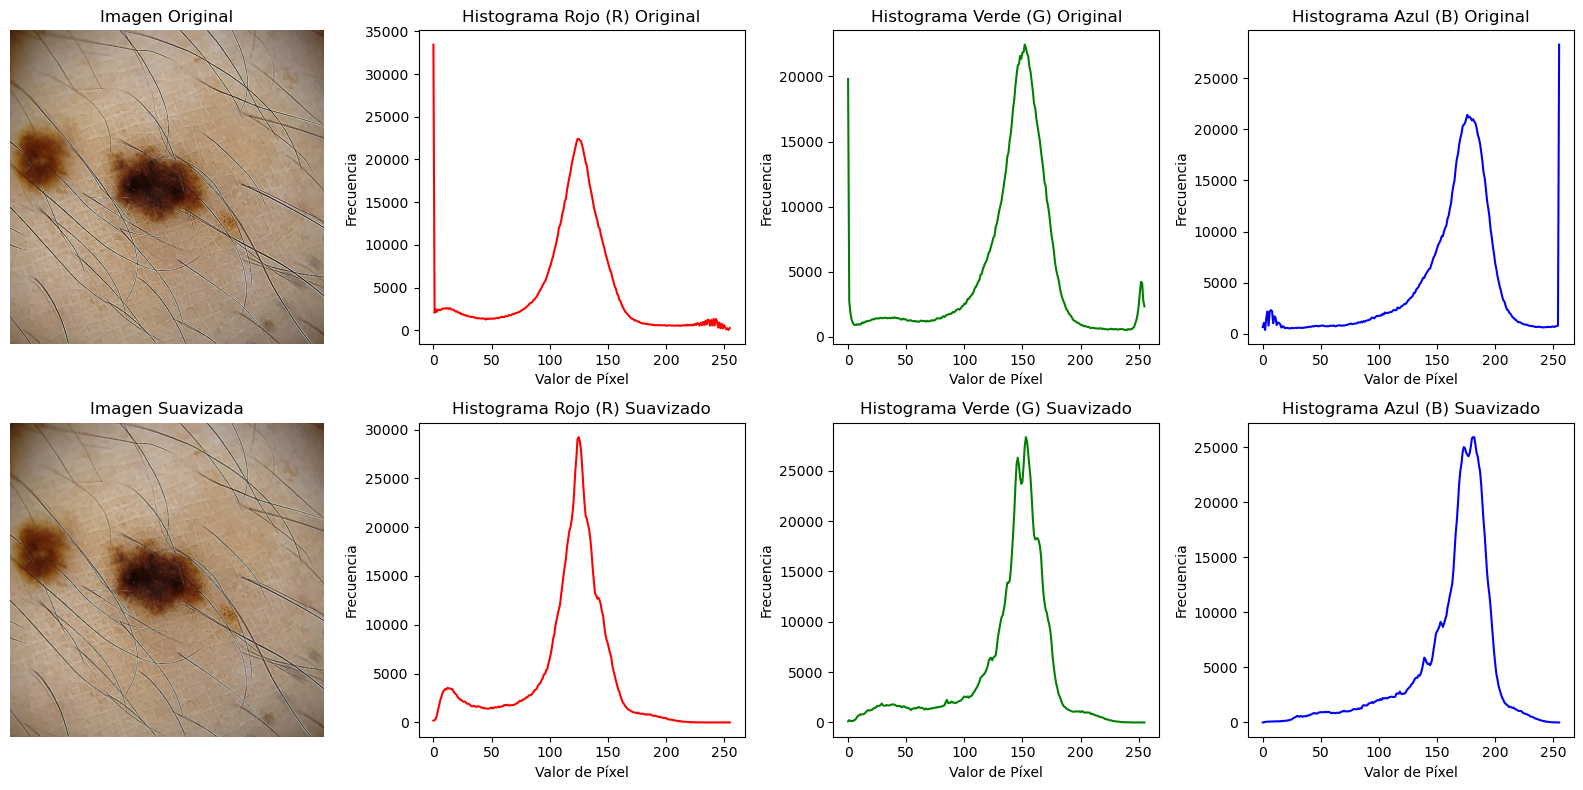

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('imagen_agudizada.jpg')

# Crear el kernel de suavizado (filtro de promedio)
kernel_suavizado = np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]]) / 9.0  # Normalizar el kernel para que la suma sea 1

# Aplicar el filtro de suavizado
imagen_suavizada = cv2.filter2D(imagen, -1, kernel_suavizado)

# Calcular los histogramas de la imagen original
hist_r_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_g_original = cv2.calcHist([imagen], [1], None, [256], [0, 256])
hist_b_original = cv2.calcHist([imagen], [2], None, [256], [0, 256])

# Calcular los histogramas de la imagen suavizada
hist_r_suavizada = cv2.calcHist([imagen_suavizada], [0], None, [256], [0, 256])
hist_g_suavizada = cv2.calcHist([imagen_suavizada], [1], None, [256], [0, 256])
hist_b_suavizada = cv2.calcHist([imagen_suavizada], [2], None, [256], [0, 256])

# Crear subtramas para mostrar la imagen original, los histogramas originales y la imagen suavizada con los histogramas
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Mostrar la imagen original en la primera columna
axs[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')  # Ocultar ejes
axs[0, 0].set_title('Imagen Original')

# Mostrar el histograma del canal Rojo (R) para la imagen original en la segunda columna
axs[0, 1].plot(hist_r_original, color='red')
axs[0, 1].set_title('Histograma Rojo (R) Original')
axs[0, 1].set_xlabel('Valor de Píxel')
axs[0, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen original en la tercera columna
axs[0, 2].plot(hist_g_original, color='green')
axs[0, 2].set_title('Histograma Verde (G) Original')
axs[0, 2].set_xlabel('Valor de Píxel')
axs[0, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen original en la cuarta columna
axs[0, 3].plot(hist_b_original, color='blue')
axs[0, 3].set_title('Histograma Azul (B) Original')
axs[0, 3].set_xlabel('Valor de Píxel')
axs[0, 3].set_ylabel('Frecuencia')

# Mostrar la imagen suavizada en la quinta columna
axs[1, 0].imshow(cv2.cvtColor(imagen_suavizada, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')  # Ocultar ejes
axs[1, 0].set_title('Imagen Suavizada')

# Mostrar el histograma del canal Rojo (R) para la imagen suavizada en la sexta columna
axs[1, 1].plot(hist_r_suavizada, color='red')
axs[1, 1].set_title('Histograma Rojo (R) Suavizado')
axs[1, 1].set_xlabel('Valor de Píxel')
axs[1, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen suavizada en la séptima columna
axs[1, 2].plot(hist_g_suavizada, color='green')
axs[1, 2].set_title('Histograma Verde (G) Suavizado')
axs[1, 2].set_xlabel('Valor de Píxel')
axs[1, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen suavizada en la octava columna
axs[1, 3].plot(hist_b_suavizada, color='blue')
axs[1, 3].set_title('Histograma Azul (B) Suavizado')
axs[1, 3].set_xlabel('Valor de Píxel')
axs[1, 3].set_ylabel('Frecuencia')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Guardar la imagen suavizada
cv2.imwrite('imagen_suavizada.jpg', imagen_suavizada)

# Mostrar las subtramas
plt.show()


# REALCE (SE GUARDA CON EL NOMBRE DE "IMAGEN_REALZADA")

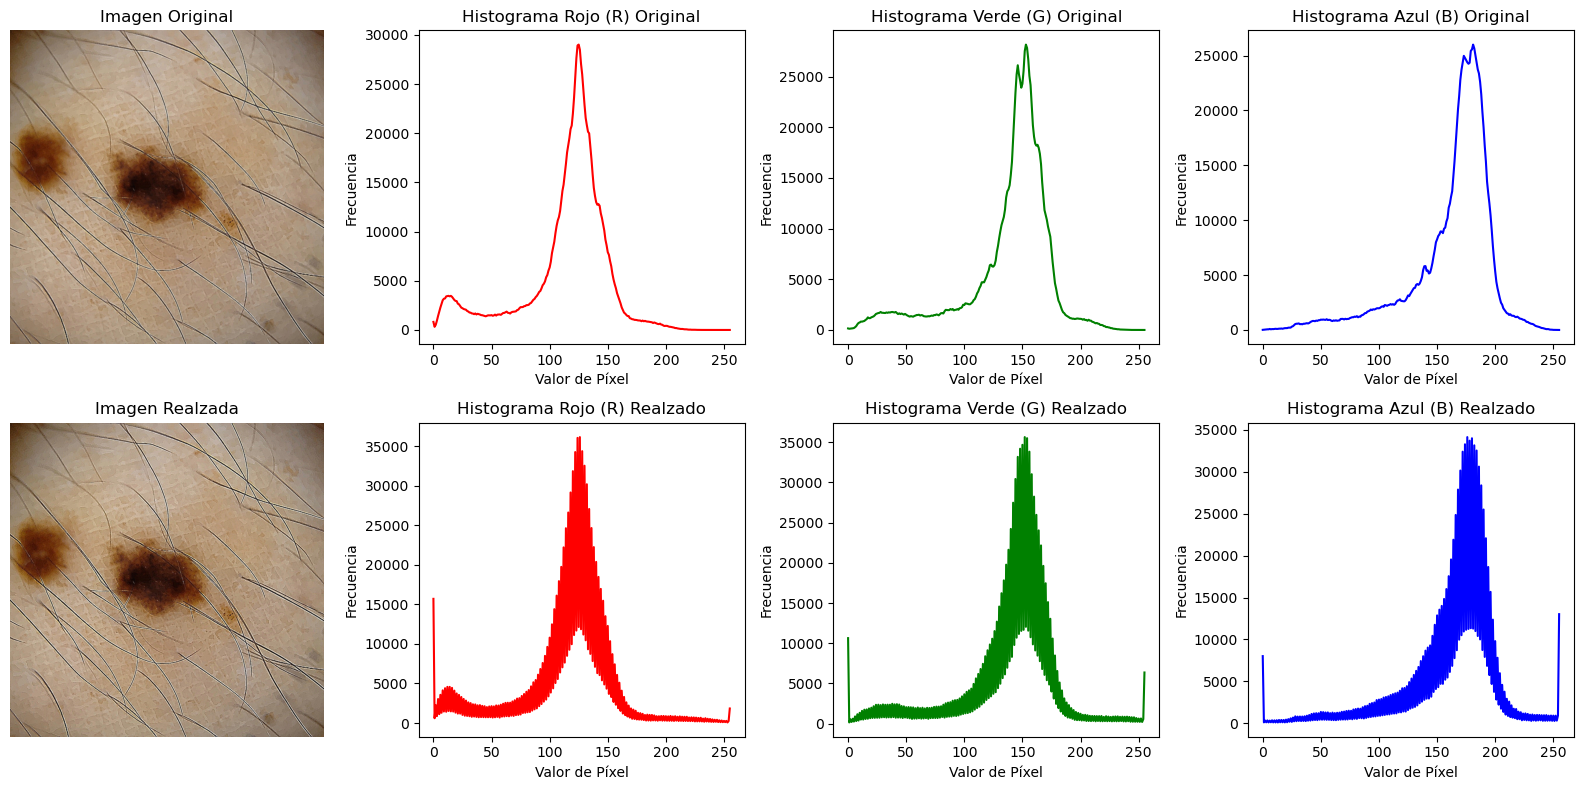

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('imagen_suavizada.jpg')

# Crear el kernel de realce de características
kernel_realce = np.array([[0, -0.5, 0],
                          [-0.5,  3, -0.5],
                          [0, -0.5, 0]])

# Aplicar el filtro de realce de características
imagen_realzada = cv2.filter2D(imagen, -1, kernel_realce)

# Calcular los histogramas de la imagen original
hist_r_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_g_original = cv2.calcHist([imagen], [1], None, [256], [0, 256])
hist_b_original = cv2.calcHist([imagen], [2], None, [256], [0, 256])

# Calcular los histogramas de la imagen realzada
hist_r_realzada = cv2.calcHist([imagen_realzada], [0], None, [256], [0, 256])
hist_g_realzada = cv2.calcHist([imagen_realzada], [1], None, [256], [0, 256])
hist_b_realzada = cv2.calcHist([imagen_realzada], [2], None, [256], [0, 256])

# Crear subtramas para mostrar la imagen original, los histogramas originales y la imagen realzada con los histogramas
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Mostrar la imagen original en la primera columna
axs[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')  # Ocultar ejes
axs[0, 0].set_title('Imagen Original')

# Mostrar el histograma del canal Rojo (R) para la imagen original en la segunda columna
axs[0, 1].plot(hist_r_original, color='red')
axs[0, 1].set_title('Histograma Rojo (R) Original')
axs[0, 1].set_xlabel('Valor de Píxel')
axs[0, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen original en la tercera columna
axs[0, 2].plot(hist_g_original, color='green')
axs[0, 2].set_title('Histograma Verde (G) Original')
axs[0, 2].set_xlabel('Valor de Píxel')
axs[0, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen original en la cuarta columna
axs[0, 3].plot(hist_b_original, color='blue')
axs[0, 3].set_title('Histograma Azul (B) Original')
axs[0, 3].set_xlabel('Valor de Píxel')
axs[0, 3].set_ylabel('Frecuencia')

# Mostrar la imagen realzada en la quinta columna
axs[1, 0].imshow(cv2.cvtColor(imagen_realzada, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')  # Ocultar ejes
axs[1, 0].set_title('Imagen Realzada')

# Mostrar el histograma del canal Rojo (R) para la imagen realzada en la sexta columna
axs[1, 1].plot(hist_r_realzada, color='red')
axs[1, 1].set_title('Histograma Rojo (R) Realzado')
axs[1, 1].set_xlabel('Valor de Píxel')
axs[1, 1].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Verde (G) para la imagen realzada en la séptima columna
axs[1, 2].plot(hist_g_realzada, color='green')
axs[1, 2].set_title('Histograma Verde (G) Realzado')
axs[1, 2].set_xlabel('Valor de Píxel')
axs[1, 2].set_ylabel('Frecuencia')

# Mostrar el histograma del canal Azul (B) para la imagen realzada en la octava columna
axs[1, 3].plot(hist_b_realzada, color='blue')
axs[1, 3].set_title('Histograma Azul (B) Realzado')
axs[1, 3].set_xlabel('Valor de Píxel')
axs[1, 3].set_ylabel('Frecuencia')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Guardar la imagen realzada
cv2.imwrite('imagen_realzada.jpg', imagen_realzada)

# Mostrar las subtramas
plt.show()
